## Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war
war.filterwarnings('ignore')

In [ ]:
# Load the data
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')
df.shape

(19104, 14)

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


# Exploratory Data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
print(f"Columns - {df.columns}")

Columns - Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')


In [ ]:
# Checking Null
df.isnull().sum()

# There is lots of null values for features LastWorkingDate, age and gender

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
print(f"Number of rows - {df.shape[0]} ")
print(f"Number of columns - {df.shape[1]} ")
print(f"Unique Driver - {df['Driver_ID'].nunique()}")


Number of rows - 19104 
Number of columns - 14 
Unique Driver - 2381


In [ ]:
# It shows, We have duplicated values as total row is 19104 and Unique row is 2381
# Lets find out count of unique values


In [ ]:
df.groupby('Driver_ID')['Income'].count().sort_values(ascending=False).reset_index().rename(columns={'Income':'Count'})

,Driver_ID,Count
0,2110,24
1,2617,24
2,1623,24
3,1642,24
4,1644,24
...,...,...
2376,1614,1
2377,445,1
2378,2397,1
2379,1619,1


In [ ]:
# Lets check the Granuality about data repetition
df_driver_2110 = df[df['Driver_ID'] == 2110]
df_driver_2110

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
14143,14143,01/01/19,2110,36.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14144,14144,02/01/19,2110,36.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14145,14145,03/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14146,14146,04/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14147,14147,05/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14148,14148,06/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14149,14149,07/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14150,14150,08/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14151,14151,09/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1
14152,14152,10/01/19,2110,37.0,0.0,C19,0,131847,21/01/16,NaN,5,5,0,1


In [ ]:
## It shows, For a single drivere rows at each month level - interesting!
# Lets aggregate the data

In [ ]:
df_mod = df.groupby("Driver_ID").agg({
    'MMM-YY': 'size',
    'Age': 'max',
    'City': lambda x: ', '.join(np.unique(x)),
    'Education_Level': 'max',
    'Income': 'mean',
    'Dateofjoining': lambda x: ', '.join(np.unique(x)),
    'Joining Designation': 'max',
    'Grade': 'mean',
    'Total Business Value': 'sum',
    'Quarterly Rating': 'mean'
}).reset_index()

df_mod.head()

,Driver_ID,MMM-YY,Age,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0
1,2,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0
2,4,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0
3,5,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0
4,6,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6


In [ ]:
# renaiming columns
df_mod.rename(columns = {'MMM-YY':'Length_of_Service','Dateofjoining':'Date_of_Joining','Joining Designation':'Joining_Designation','Total Business Value': 'Total_Business_Value', 'Quarterly Rating': 'Quarterly_Rating'}, inplace= True)
df_mod.head()

,Driver_ID,Length_of_Service,Age,City,Education_Level,Income,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0
1,2,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0
2,4,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0
3,5,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0
4,6,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6


In [ ]:
print(f"Number of rows - {df_mod.shape[0]}")
print(f"Number of unique Drive - {df_mod['Driver_ID'].count()}")
# Now we have unique entries across driver

Number of rows - 2381
Number of unique Drive - 2381


In [ ]:
final_df = pd.merge(left = df.groupby(by=['Driver_ID'])['LastWorkingDate'].unique().apply(lambda x: x[-1]), right = df_mod,  on = "Driver_ID", how="outer")
final_df

,Driver_ID,LastWorkingDate,Length_of_Service,Age,City,Education_Level,Income,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.000000
1,2,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.000000
2,4,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.000000
3,5,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.000000
4,6,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,NaN,24,34.0,C24,0,82815.0,15/10/15,2,3.0,21748820,2.625000
2377,2785,28/10/20,3,34.0,C9,0,12105.0,28/08/20,1,1.0,0,1.000000
2378,2786,22/09/19,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667
2379,2787,20/06/19,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000


In [ ]:
final_df = pd.merge(left = df.groupby(by=['Driver_ID'])['Gender'].unique().apply(lambda x: x[-1]), right = final_df,  on = "Driver_ID", how="outer")
final_df.head()

,Driver_ID,Gender,LastWorkingDate,Length_of_Service,Age,City,Education_Level,Income,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0
1,2,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0
2,4,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0
3,5,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0
4,6,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6


# Feature Engineering
### Target value creation

In [ ]:
final_df['Churn'] = final_df['LastWorkingDate'].fillna(0)
final_df['Churn'] = final_df['Churn'].apply(lambda x: 1 if x != 0 else 0)
final_df.head()

,Driver_ID,Gender,LastWorkingDate,Length_of_Service,Age,City,Education_Level,Income,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn
0,1,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0,1
1,2,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0,0
2,4,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0,1
3,5,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0,1
4,6,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6,0


In [ ]:
final_df['Churn'].value_counts(normalize=True)

Churn
1    0.678706
0    0.321294
Name: proportion, dtype: float64

1. ~68% of driver churn
2. ~32% of driver didn't churn

### Checking the quarterly rating has increased

In [ ]:
def check_delta(ratings):
  if len(ratings)>2:
    ratings = np.sort(ratings)
    if ratings[-1] > ratings[-2]:
      return 1
    else:
      return 0
  else:
    return 0

In [ ]:
quarterly_rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(check_delta).reset_index().rename(columns={'Quarterly Rating':'Quarterly_Rating_Increased'})
final_df = pd.merge(left = quarterly_rating_increased,right = final_df,on = "Driver_ID",how="outer")
final_df.rename(columns = {'Quarterly Rating':'Quarterly_Rating_Increase'}, inplace= True)
final_df.head()

,Driver_ID,Quarterly_Rating_Increased,Gender,LastWorkingDate,Length_of_Service,Age,City,Education_Level,Income,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn
0,1,0,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0,1
1,2,0,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0,0
2,4,0,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0,1
3,5,0,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0,1
4,6,0,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6,0


In [ ]:
income_counts = final_df.groupby('Driver_ID')['Income'].count().sort_values(ascending=False).reset_index().rename(columns={'Income':'Count'})
drivers_with_multiple_incomes = income_counts[income_counts['Count'] > 1]
drivers_with_multiple_incomes

# There is no driver whose income increase from x to x+1, hence below income_increased will not have any data

,Driver_ID,Count


In [ ]:
income_increased = df.groupby("Driver_ID")["Income"].unique().apply(check_delta).reset_index().rename(columns={'Income':'Income_Increased'})
final_df = pd.merge(left = income_increased,right = final_df,on = "Driver_ID",how="outer")
final_df['Income_Increased'].unique()

array([0])

In [ ]:
final_df['Date_of_Joining'] = pd.to_datetime(final_df['Date_of_Joining'])
final_df['LastWorkingDate'] = pd.to_datetime(final_df['LastWorkingDate'])
final_df['Driver_tenure_days'] = (final_df['LastWorkingDate'] - final_df['Date_of_Joining']).dt.days

In [ ]:
final_df["Grade"] = np.round(final_df["Grade"])
final_df["Quarterly_Rating"]= final_df["Quarterly_Rating"].round()


# Visualization

In [ ]:
# Dropping Unnecessary column to remove complexity and help better understaing in Visualization.
final_df.drop(["LastWorkingDate","Date_of_Joining","Driver_ID","Date_of_Joining","Income_Increased"],inplace=True,axis = 1)

In [ ]:
final_df['Churn'].value_counts(normalize=True)

Churn
1    0.678706
0    0.321294
Name: proportion, dtype: float64

In [ ]:
# Defining Visualization function to used as per requirement and analysis.
def plot_histogram(df, hue = None):
    """ To Plot the histogram of the continuous feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    sns.displot(x = df, hue = hue, kind='kde', color='red')
    plt.title(f'Datapoint distribution of {df.name}')



def plot_countplot(df, feature, hue=None, n=100):
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in DataFrame columns")

    if hue and hue not in df.columns:
        raise ValueError(f"Hue column '{hue}' not found in DataFrame columns")

    print(df[feature].describe())

    plt.figure(figsize=(10, 6))
    plt.title(f'Datapoint distribution of {feature}')

    # Plot countplot
    sns.countplot(data=df, x=feature, hue=hue, order=df[feature].value_counts().index[:n])
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()


def plot_boxplot(df, x, y):
    """To plot boxplot to get the distribution between target variable and other feature"""
    if x not in df.columns or y not in df.columns:
        raise ValueError(f"One or both columns '{x}' and '{y}' not found in DataFrame")

    plt.figure(figsize=(10, 6))
    plt.title(f'Datapoint distribution between {x} and {y}')

    # Create the boxplot
    sns.boxplot(x=df[x], y=df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

def plot_scatter(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.scatterplot(x,y,color='green')


def plot_heatmap(df, x=10, y=6):
    """To plot the correlation matrix to understand which feature is more related to target variable"""
    # Filter out only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=['number'])

    if numeric_df.empty:
        raise ValueError("No numeric data found in DataFrame to compute correlation matrix")

    plt.figure(figsize=(x, y))
    plt.title('Correlation Matrix')

    # Plot the heatmap of the correlation matrix
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

    plt.show()

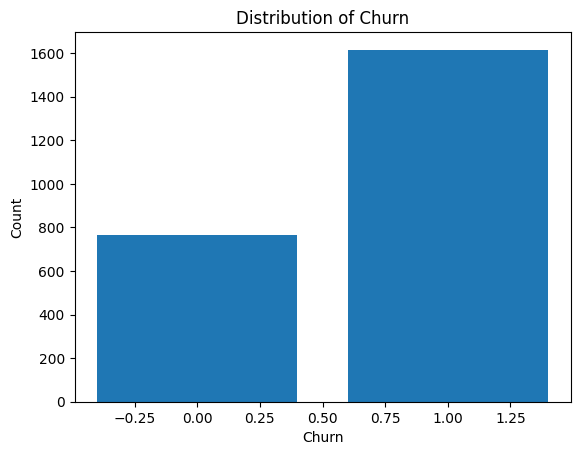

In [ ]:
churn_counts = final_df['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show()


count    2381.000000
mean       33.663167
std         5.983375
min        21.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        58.000000
Name: Age, dtype: float64


<Figure size 1000x600 with 0 Axes>

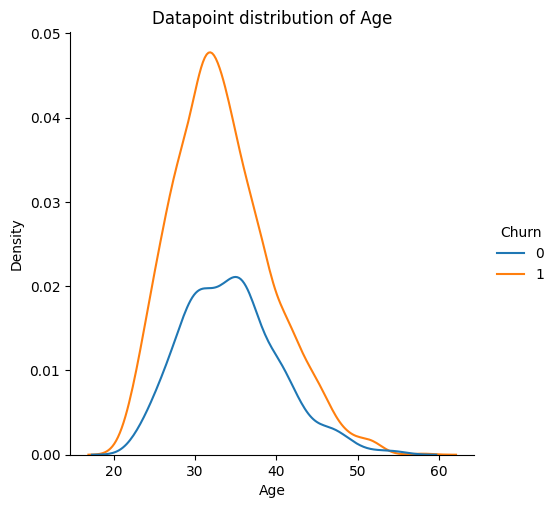

In [ ]:
plot_histogram(final_df['Age'], hue = final_df['Churn'])
# Insight: Driver age group between 25-45 is mostly to churn.

count      2381.000000
mean      59232.460484
std       28298.214012
min       10747.000000
25%       39104.000000
50%       55285.000000
75%       75835.000000
max      188418.000000
Name: Income, dtype: float64


<Figure size 1000x600 with 0 Axes>

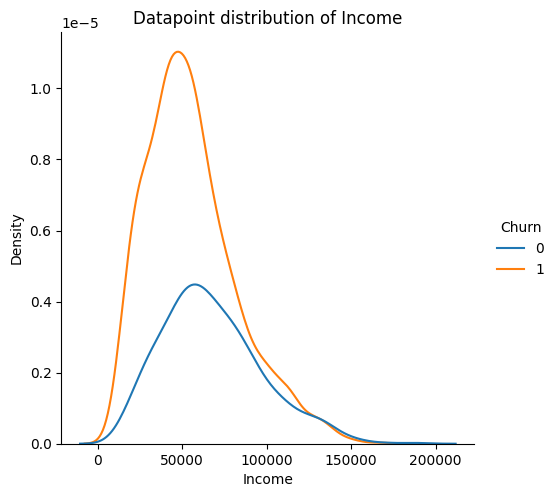

In [ ]:
plot_histogram(final_df['Income'], hue=final_df['Churn'])
# 1.Driver earning or has income between 40k to 8ok has a very high churn rate.

count    2381.000000
mean        0.187736
std         0.390583
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Quarterly_Rating_Increased, dtype: float64


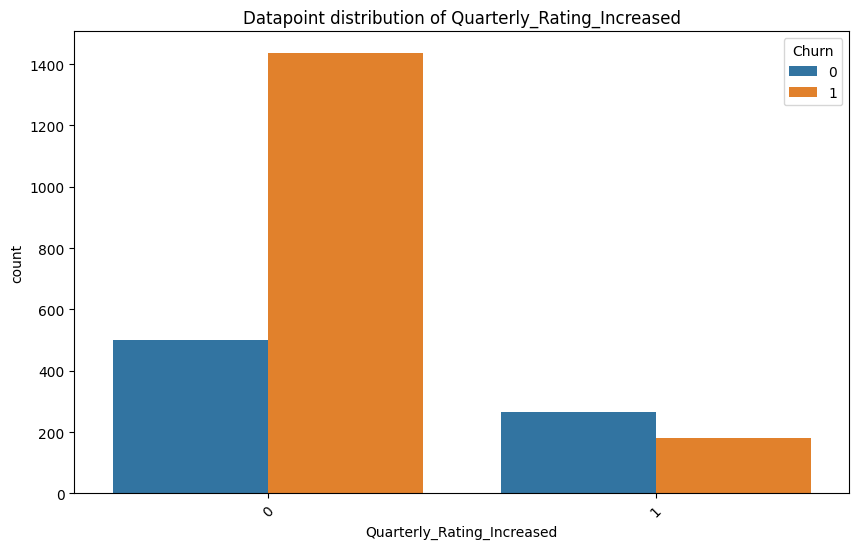

In [ ]:
plot_countplot(final_df,feature = 'Quarterly_Rating_Increased', hue='Churn')

count    2381.00000
mean        1.00756
std         0.81629
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max         2.00000
Name: Education_Level, dtype: float64


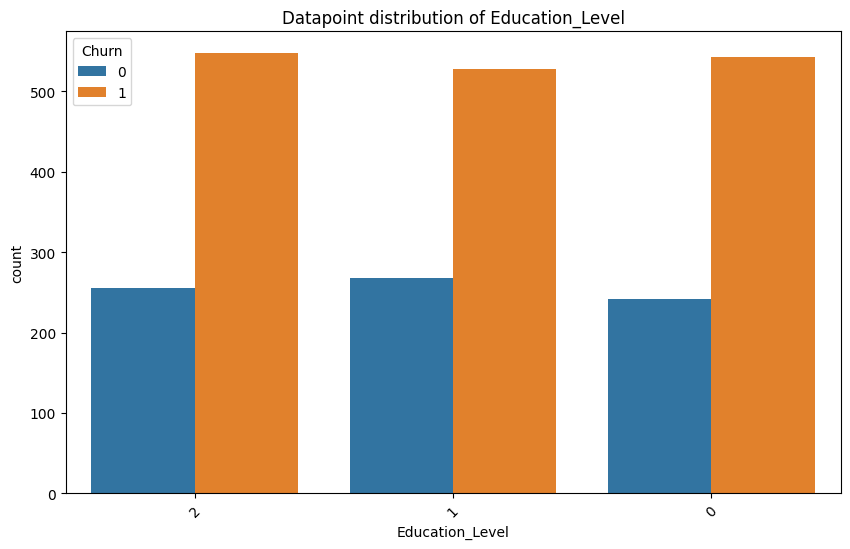

In [ ]:
plot_countplot(final_df, feature='Education_Level', hue='Churn')
# Insight: For every education level, churn rate is very high

count     2381
unique      29
top        C20
freq       152
Name: City, dtype: object


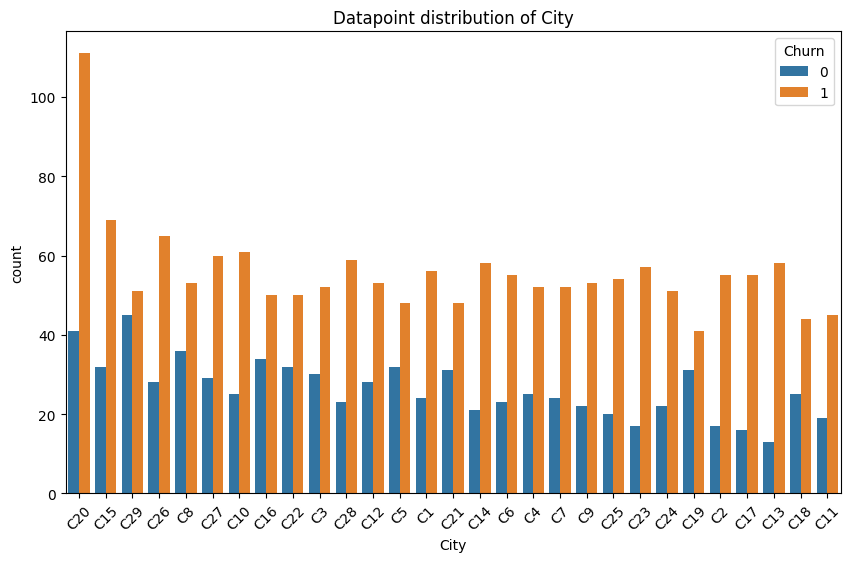

In [ ]:
plot_countplot(final_df,feature = 'City', hue='Churn')
# Insight: City: C20,C15,C29 ae some of the top cities with higher curn rate.

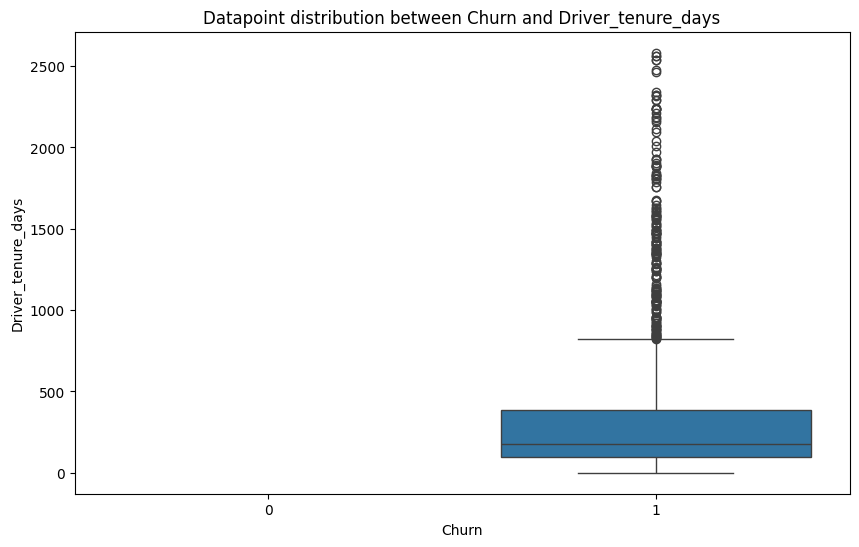

In [ ]:
plot_boxplot(final_df, x='Churn', y='Driver_tenure_days')
# Insight:
#1) The Median churn rate for drivers are within 100 days of joining.
#2) There is lots of outlier

count    2.381000e+03
mean     4.586742e+06
std      9.127115e+06
min     -1.385530e+06
25%      0.000000e+00
50%      8.176800e+05
75%      4.173650e+06
max      9.533106e+07
Name: Total_Business_Value, dtype: float64


<Figure size 1000x600 with 0 Axes>

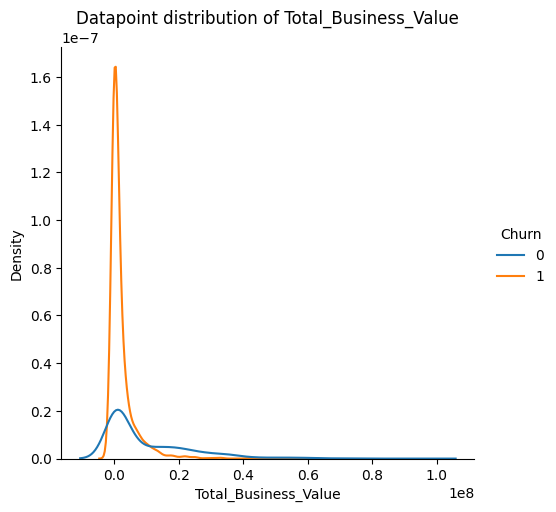

In [ ]:
plot_histogram(final_df['Total_Business_Value'], hue=final_df['Churn'])

count    2381.000000
mean        2.078538
std         0.931321
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Grade, dtype: float64


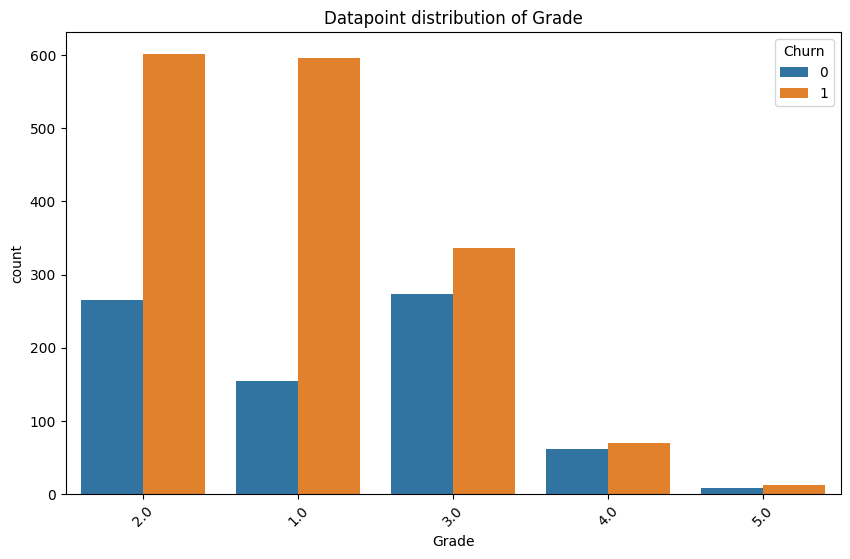

In [ ]:
plot_countplot(final_df,feature = 'Grade', hue='Churn')

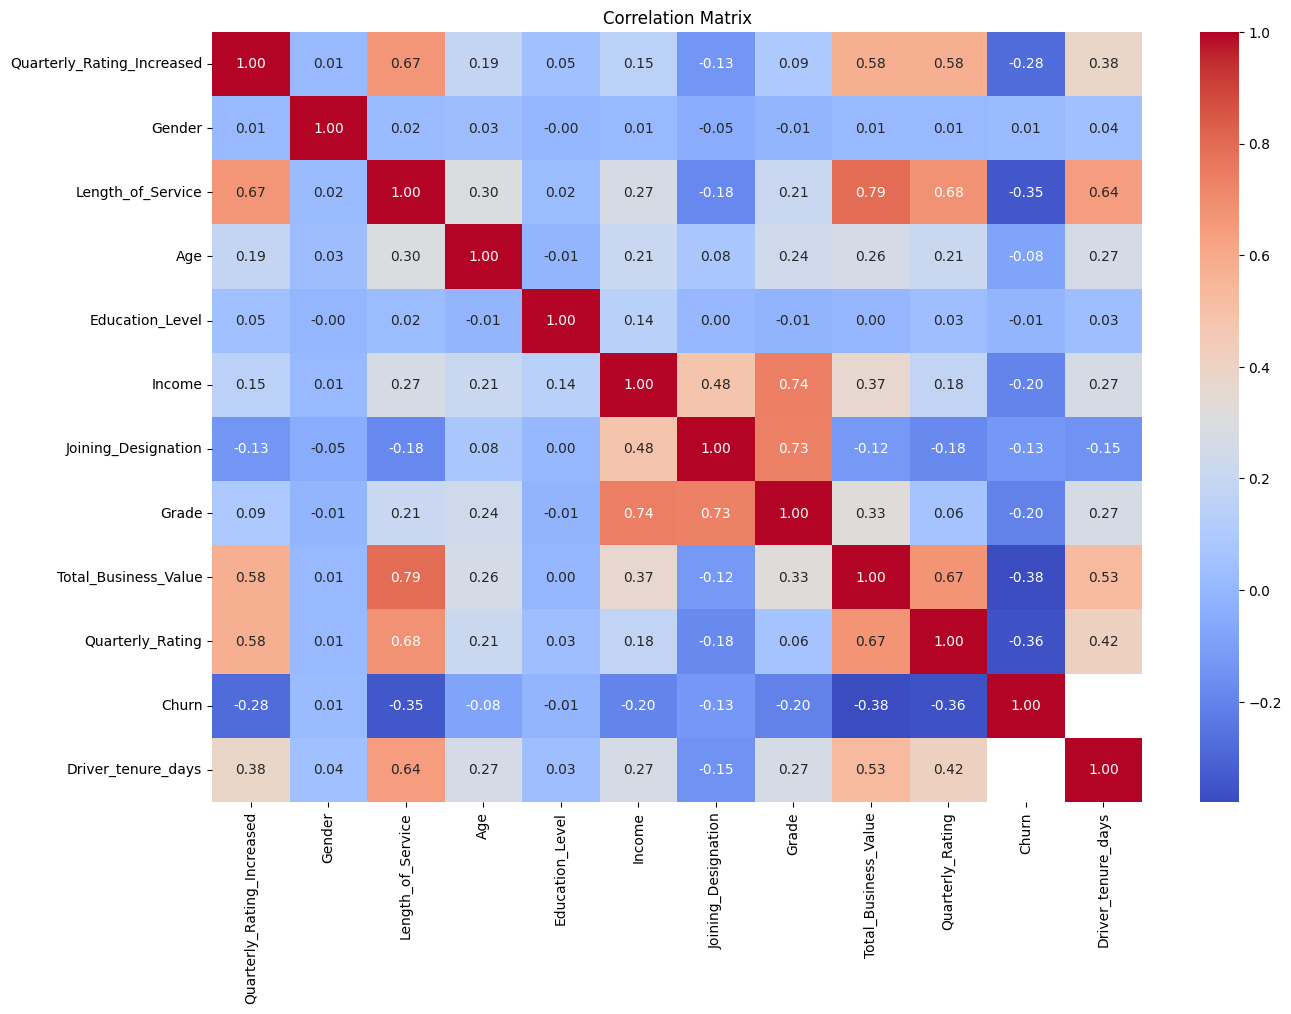

In [ ]:
plot_heatmap(final_df, x = 15, y = 10)
# Insight
# 1. Lenght of service has trong positive correlation with Total_Business_Value showing a crucial variable.

#### Handling Null

In [ ]:
final_df.isnull().sum()

Quarterly_Rating_Increased      0
Gender                         45
Length_of_Service               0
Age                             0
City                            0
Education_Level                 0
Income                          0
Joining_Designation             0
Grade                           0
Total_Business_Value            0
Quarterly_Rating                0
Churn                           0
Driver_tenure_days            765
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer_frequent = SimpleImputer(strategy='most_frequent')
imputer_median = SimpleImputer(strategy='median')
final_df["Gender"] = imputer_frequent.fit_transform(final_df["Gender"].values.reshape(-1, 1))
final_df["Driver_tenure_days"] = imputer_median.fit_transform(final_df["Driver_tenure_days"].values.reshape(-1, 1))

In [ ]:
final_df.isnull().sum()

Quarterly_Rating_Increased    0
Gender                        0
Length_of_Service             0
Age                           0
City                          0
Education_Level               0
Income                        0
Joining_Designation           0
Grade                         0
Total_Business_Value          0
Quarterly_Rating              0
Churn                         0
Driver_tenure_days            0
dtype: int64

In [ ]:
final_df.head()

,Quarterly_Rating_Increased,Gender,Length_of_Service,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Driver_tenure_days
0,0,0.0,3,28.0,C23,2,57387.0,1,1.0,1715580,2.0,1,77.0
1,0,0.0,2,31.0,C7,2,67016.0,2,2.0,0,1.0,0,176.0
2,0,0.0,5,43.0,C13,2,65603.0,2,2.0,350000,1.0,1,142.0
3,0,0.0,3,29.0,C9,0,46368.0,1,1.0,120360,1.0,1,57.0
4,0,1.0,5,31.0,C11,1,78728.0,3,3.0,1265000,2.0,0,176.0


## Encoding

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder
target_encoder = TargetEncoder(cols=['City'])
final_df['City'] = target_encoder.fit_transform(final_df['City'], final_df['Churn'])


## MODEL Building

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income_Increased            2381 non-null   int64  
 1   Quarterly_Rating_Increased  2381 non-null   int64  
 2   Gender                      2381 non-null   float64
 3   Length_of_Service           2381 non-null   int64  
 4   Age                         2381 non-null   float64
 5   City                        2381 non-null   float64
 6   Education_Level             2381 non-null   int64  
 7   Income                      2381 non-null   float64
 8   Joining_Designation         2381 non-null   int64  
 9   Grade                       2381 non-null   float64
 10  Total_Business_Value        2381 non-null   int64  
 11  Quarterly_Rating            2381 non-null   float64
 12  Churn                       2381 non-null   int64  
 13  Driver_tenure_days          2381 

In [ ]:
X = final_df.drop(["Churn"],axis = 1)
y = final_df["Churn"]

In [ ]:
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)
X

,Income_Increased,Quarterly_Rating_Increased,Gender,Length_of_Service,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Driver_tenure_days
0,0.0,0.0,0.0,3.0,28.0,0.769859,2.0,57387.0,1.0,1.0,1715580.0,2.0,77.0
1,0.0,0.0,0.0,2.0,31.0,0.684190,2.0,67016.0,2.0,2.0,0.0,1.0,176.0
2,0.0,0.0,0.0,5.0,43.0,0.816064,2.0,65603.0,2.0,2.0,350000.0,1.0,142.0
3,0.0,0.0,0.0,3.0,29.0,0.706553,0.0,46368.0,1.0,1.0,120360.0,1.0,57.0
4,0.0,0.0,1.0,5.0,31.0,0.702829,1.0,78728.0,3.0,3.0,1265000.0,2.0,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,1.0,0.0,24.0,34.0,0.698531,0.0,82815.0,2.0,3.0,21748820.0,3.0,176.0
2377,0.0,0.0,1.0,3.0,34.0,0.706553,0.0,12105.0,1.0,1.0,0.0,1.0,61.0
2378,0.0,0.0,0.0,9.0,45.0,0.570044,0.0,35370.0,2.0,2.0,2815090.0,2.0,418.0
2379,0.0,0.0,1.0,6.0,28.0,0.730263,2.0,69498.0,1.0,1.0,977830.0,2.0,334.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   Income_Increased            2381 non-null   int64         
 2   Quarterly_Rating_Increased  2381 non-null   int64         
 3   Gender                      2381 non-null   float64       
 4   LastWorkingDate             1616 non-null   datetime64[ns]
 5   Length_of_Service           2381 non-null   int64         
 6   Age                         2381 non-null   float64       
 7   City                        2381 non-null   float64       
 8   Education_Level             2381 non-null   int64         
 9   Income                      2381 non-null   float64       
 10  Date_of_Joining             2381 non-null   datetime64[ns]
 11  Joining_Designation         2381 non-null   int64       

In [ ]:
X.describe()
## Generate Insight:

,Income_Increased,Quarterly_Rating_Increased,Gender,Length_of_Service,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Driver_tenure_days
count,2381.0,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000
mean,0.0,0.187736,0.401512,8.02352,33.663167,0.678662,1.00756,59232.460484,1.820244,2.078538,4.586742e+06,1.573289,299.235195
std,0.0,0.390583,0.490307,6.78359,5.983375,0.065356,0.81629,28298.214012,0.841433,0.931321,9.127115e+06,0.745987,385.016252
min,0.0,0.000000,0.000000,1.00000,21.000000,0.531324,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000
25%,0.0,0.000000,0.000000,3.00000,29.000000,0.634237,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,129.000000
50%,0.0,0.000000,0.000000,5.00000,33.000000,0.698531,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,176.000000
75%,0.0,0.000000,1.000000,10.00000,37.000000,0.719430,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,259.000000
max,0.0,1.000000,1.000000,24.00000,58.000000,0.816064,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2582.000000


### Train Test result

In [ ]:
X_train , X_test, y_train ,y_test = train_test_split(X,y,random_state=5,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest - Bagging technique

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [ ]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10)

In [ ]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.9984243697478992, 0.9958071278825996)

In [ ]:
RF.feature_importances_

array([0.00000000e+00, 1.21288260e-02, 2.32227651e-04, 1.11242842e-01,
       1.27569164e-02, 9.47239868e-03, 3.82115223e-04, 1.44709694e-02,
       2.19630275e-02, 1.15050531e-02, 5.84785142e-02, 3.78211781e-02,
       7.09545932e-01])

<Axes: >

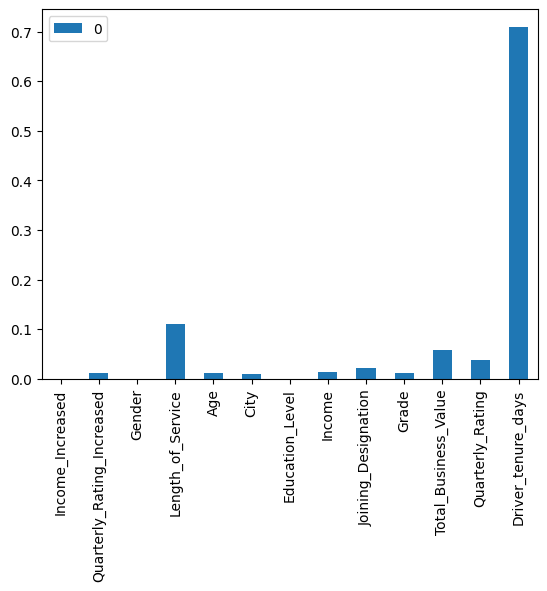

In [ ]:
pd.DataFrame(data=RF.feature_importances_,index=X.columns).plot(kind="bar")
# generate Insight

In [ ]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix
confusion_matrix(y_test,RF.predict(X_test) )

array([[162,   0],
       [  2, 313]])

In [ ]:
confusion_matrix(y_train,RF.predict(X_train) )

array([[ 603,    0],
       [   3, 1298]])

In [ ]:
f1_score(y_test,RF.predict(X_test)),f1_score(y_train,RF.predict(X_train))

(0.9968152866242038, 0.9988457098884186)

In [ ]:
precision_score(y_test,RF.predict(X_test)),precision_score(y_train,RF.predict(X_train))

(1.0, 1.0)

In [ ]:
recall_score(y_test,RF.predict(X_test)),recall_score(y_train,RF.predict(X_train))

(0.9936507936507937, 0.9976940814757879)

#### GridSearchCV - on RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,  # We don't need to train the model again as this parameter takes care of it.
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)

In [ ]:
grid_search.fit(X_train,y_train.values.ravel())


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.0005, max_depth=7, max_features=10)

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0.0005, 'max_depth': 7, 'max_features': 10, 'n_estimators': 100}

### BaggingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging_classifier_model = BaggingClassifier(base_estimator=  DecisionTreeClassifier(max_depth=7,
                                                                                     class_weight="balanced"),
                                            n_estimators=50,
                                            max_samples=1.0,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=False,
                                            oob_score=False,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)


In [ ]:
bagging_classifier_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50)

In [ ]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

In [ ]:
y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)

In [ ]:

confusion_matrix(y_test,y_test_pred)

array([[162,   0],
       [  2, 313]])

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[ 603,    0],
       [   1, 1300]])

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.9968152866242038, 0.9996155324875049)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(1.0, 1.0)

In [ ]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9936507936507937, 0.9992313604919293)

In [ ]:
bagging_classifier_model.score(X_test,y_test)

0.9958071278825996

In [ ]:
bagging_classifier_model.score(X_train,y_train)

0.9994747899159664

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[2,4,6,10],
             "n_estimators":[100,200,300,400]    }


grid_search = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # We don't need to train the model again as this parameter takes care of it.
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


In [ ]:
grid_search.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:

grid_search.best_score_

0.9973745001117762

In [ ]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [ ]:
xgb = XGBClassifier(n_estimators=100,
                   max_depth = 4)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [ ]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[162,   0],
       [  4, 311]])

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[ 603,    0],
       [   0, 1301]])

In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test,y_test)

(1.0, 0.9916142557651991)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.9936102236421726, 1.0)

In [ ]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9873015873015873, 1.0)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(1.0, 1.0)

In [ ]:
xgb.feature_importances_

array([0.0000000e+00, 0.0000000e+00, 1.1022718e-02, 8.6099822e-03,
       2.3034564e-03, 1.7006688e-03, 1.3945979e-03, 2.3218817e-03,
       1.3287577e-03, 6.5886597e-03, 3.1224985e-03, 7.1692606e-04,
       9.6088982e-01], dtype=float32)

<Axes: >

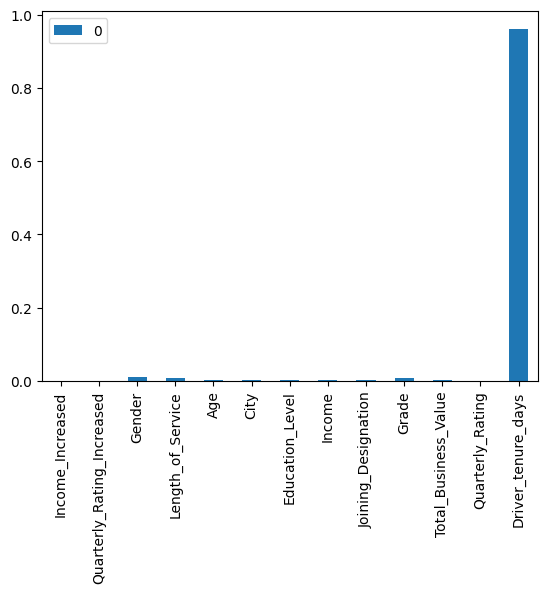

In [ ]:
pd.DataFrame(data=xgb.feature_importances_,index=X.columns).plot(kind="bar")

### Gradient Boosting Classifier

In [ ]:
def GradientBoostingClassifier(X, y):
    from sklearn.ensemble import  GradientBoostingClassifier
    from sklearn.metrics import f1_score, accuracy_score , roc_auc_score,auc,recall_score,precision_score
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)

    lr = GradientBoostingClassifier()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),'\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),'\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:,1], y_test)

In [ ]:
probs , y_test = GradientBoostingClassifier(X,y)

Train Score :  1.0 

Test Score :  0.9979035639412998 

Accuracy Score :  0.9979035639412998 

[[148   0]
 [  1 328]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9992401215805471 

precision score  test dataset:   1.0 

Recall score  test dataset:   0.9969604863221885 

f1 score  test dataset :   0.9984779299847794 



In [ ]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()

def plot_roc(y_test,probs):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

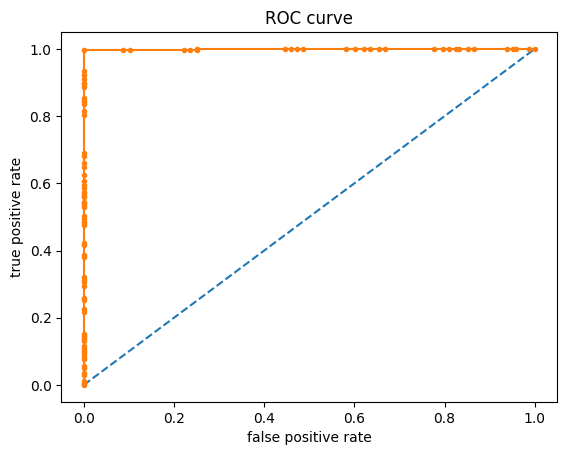

In [ ]:
plot_roc(y_test , probs)

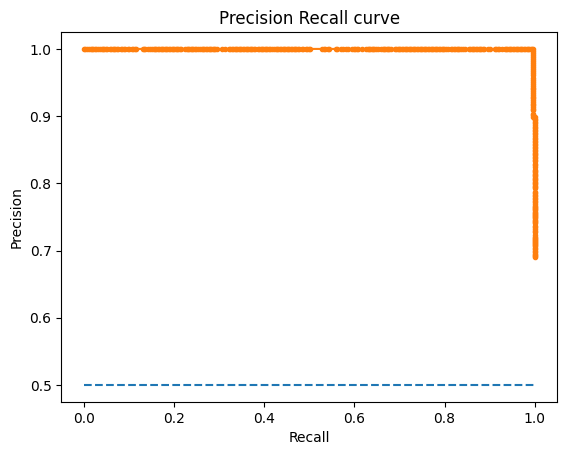

In [ ]:
plot_pre_curve(y_test , probs)

## Insights

1. **Missing Values:** There are significant missing values across several features, including Age, Gender, and Last Working Day (Label).

2. **Duplicated Entries:** The dataset contains numerous duplicated driver entries, and the data is available at a monthly granularity.

3. **Income Increase:** There are no drivers in the dataset whose income has increased.

4. **Churn Rates:** Approximately 68% of drivers have a high churn rate, while only about 22% of drivers are likely to remain.

5. **Age and Income Correlation:** Drivers aged between 25 and 45 exhibit a high churn rate. Additionally, drivers with an income ranging from 40k to 80k show a very high churn rate.

6. **Education Level:** Churn rates are notably high across all education levels.

7. **Top Cities:** Cities C20, C15, and C29 have the highest churn rates.

## Recommendation
**Enhance Driver Income Tracking:**

Investigate the reasons behind the lack of income increases. Implement measures to provide career growth opportunities or financial incentives for drivers to reduce churn.

**Target Specific Age and Income Groups:**

Develop targeted retention strategies for drivers aged 25 to 45 and those with incomes between 40k to 80k. Consider personalized incentives, career development programs, or flexible work options to address their specific needs and reduce churn.

**Improve Retention Strategies in High-Churn Cities:**

Focus on cities with the highest churn rates (C20, C15, and C29). Conduct localized studies to understand the root causes of high churn and implement city-specific retention programs or adjustments to improve driver satisfaction and reduce turnover.

## Thank You